## Data trimming

In [1]:
print(sys.path)

['c:\\Users\\malth\\OneDrive\\Documents\\Cand.merc.it\\AI & Robotics\\AI---Robotics', 'c:\\Users\\malth\\.vscode\\extensions\\ms-toolsai.jupyter-2021.5.745244803\\pythonFiles', 'c:\\Users\\malth\\.vscode\\extensions\\ms-toolsai.jupyter-2021.5.745244803\\pythonFiles\\lib\\python', 'C:\\Users\\malth\\anaconda3\\python37.zip', 'C:\\Users\\malth\\anaconda3\\DLLs', 'C:\\Users\\malth\\anaconda3\\lib', 'C:\\Users\\malth\\anaconda3', '', 'C:\\Users\\malth\\AppData\\Roaming\\Python\\Python37\\site-packages', 'C:\\Users\\malth\\AppData\\Roaming\\Python\\Python37\\site-packages\\win32', 'C:\\Users\\malth\\AppData\\Roaming\\Python\\Python37\\site-packages\\win32\\lib', 'C:\\Users\\malth\\AppData\\Roaming\\Python\\Python37\\site-packages\\Pythonwin', 'C:\\Users\\malth\\anaconda3\\lib\\site-packages', 'c:\\users\\malth\\appdata\\local\\packages\\pythonsoftwarefoundation.python.3.9_qbz5n2kfra8p0\\localcache\\local-packages\\python39\\site-packages', 'C:\\Users\\malth\\anaconda3\\lib\\site-packages\\w

In [2]:
import mysql.connector as connection
from collections import Counter
import pandas as pd
try:
    mydb = connection.connect(host="articledb.cubzpcv3efmw.us-east-2.rds.amazonaws.com", database = 'Database',user="admin", password="admin123",use_pure=True)
except Exception as e:
    mydb.close()
    print(str(e))
    

In [3]:
#Det er muligt at tilføje flere varianter
query_day = "SELECT * FROM Combined_Table INNER JOIN Apple_Stock_Data ON Article_date=Date;"
query_day1 ="SELECT * FROM Combined_Table INNER JOIN Apple_Stock_Data ON STR_TO_DATE(Article_date, '%d %M %y')=DATE_ADD(STR_TO_DATE(Date, '%d %M %y'), INTERVAL -1 DAY);"
query_day2 = "SELECT * FROM Combined_Table INNER JOIN Apple_Stock_Data ON STR_TO_DATE(Article_date, '%d %M %y')=DATE_ADD(STR_TO_DATE(Date, '%d %M %y'), INTERVAL -3 DAY);"

df_combined_dayX = pd.read_sql(query_day, mydb)
df_combined_day = pd.read_sql(query_day1, mydb)
df_combined_day2 = pd.read_sql(query_day2, mydb)

mydb.close()

In [4]:
#df_AppleNewsRoom[df_AppleNewsRoom['Stock_Classifier'] == "High Fall"]

#Counter(" ".join(df_combined_day1[df_combined_day1['Stock_Classifier'] == "High Rise"]["Title"]).split()).most_common(100)

df_combined_day

,Article_ID,Title,URL,Sub_title,Article_date,Tag,Publisher,Full_Article,Date,Close_Last,Volume,Open,High,Low,Diff_Open_Close,Increase_Decrease,Price_Stock_Classifier,Percentage,Stock_Class
0,3,New Apple products coming in March 2021,https://www.macworld.co.uk/news/new-apple-prod...,"From new iPads to the AirPods 3, and from an u...",23 Feb 21,None,Macworld,None,24 Feb 21,125.35,111039900,124.94,125.56,122.23,0.41,Rise,Minor Rise,0.328,Minor Rise
1,4,Apple demands Steam sales data for fight again...,https://www.macworld.co.uk/news/steam-sales-da...,Apple's lawyers are pushing for Valve to relea...,23 Feb 21,None,Macworld,None,24 Feb 21,125.35,111039900,124.94,125.56,122.23,0.41,Rise,Minor Rise,0.328,Minor Rise
2,5,No Apple event on 16 March - Mark Gurman,https://www.macworld.co.uk/news/no-apple-event...,Respected analyst pours cold water on latest r...,22 Feb 21,None,Macworld,None,23 Feb 21,125.86,158273000,123.76,126.71,118.39,2.10,Rise,Medium Rise,1.697,Major Rise
3,8,'Dating game' continues for Apple Car project,https://www.macworld.co.uk/news/apple-car-manu...,Apple is still on the lookout for a bride for ...,17 Feb 21,None,Macworld,None,18 Feb 21,129.71,96856750,129.20,130.00,127.41,0.51,Rise,Minor Rise,0.395,Minor Rise
4,9,Zuckerberg: 'We need to inflict pain' on Apple,https://www.macworld.co.uk/news/zuckerberg-pai...,Leaked private communications reveal the depth...,16 Feb 21,None,Macworld,None,17 Feb 21,130.84,98085250,131.25,132.22,129.47,-0.41,Fall,Minor Fall,-0.312,Minor Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18964,20910,Samsung Again Rumored to Be Exclusive Supplier...,https://www.macrumors.com/2016/12/29/samsung-a...,None,29 Dec 16,None,MacRumors,None,30 Dec 16,28.96,122223600,29.16,29.30,28.86,-0.21,Fall,Minor Fall,-0.712,Minor Fall
18965,20911,New Report Delves Into Inner Workings of Foxco...,https://www.macrumors.com/2016/12/29/foxconns-...,None,29 Dec 16,None,MacRumors,None,30 Dec 16,28.96,122223600,29.16,29.30,28.86,-0.21,Fall,Minor Fall,-0.712,Minor Fall
18966,20912,Twitter CEO Jack Dorsey Says a Form of Editing...,https://www.macrumors.com/2016/12/29/twitter-c...,None,29 Dec 16,None,MacRumors,None,30 Dec 16,28.96,122223600,29.16,29.30,28.86,-0.21,Fall,Minor Fall,-0.712,Minor Fall
18967,20913,Here's a Detailed Aerial Photograph of Apple C...,https://www.macrumors.com/2016/12/29/apple-cam...,None,29 Dec 16,None,MacRumors,None,30 Dec 16,28.96,122223600,29.16,29.30,28.86,-0.21,Fall,Minor Fall,-0.712,Minor Fall


In [5]:
array_agg = lambda x: ' '.join(x.astype(str))

grp_sameday_df = df_combined_day.groupby(['Date'], as_index=False).agg({'Title': array_agg, 'Stock_Class' : min})

grp_sameday_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1200
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         1201 non-null   object
 1   Title        1201 non-null   object
 2   Stock_Class  1201 non-null   object
dtypes: object(3)
memory usage: 37.5+ KB


In [6]:
grp_sameday_df.Stock_Class.value_counts()

Minor Rise    336
Major Rise    315
Minor Fall    305
Major Fall    242
No Change       3
Name: Stock_Class, dtype: int64

In [7]:
grp_sameday_df = grp_sameday_df.drop(grp_sameday_df[grp_sameday_df.Stock_Class=="No Change"].index)
grp_sameday_df.Stock_Class.value_counts()

Minor Rise    336
Major Rise    315
Minor Fall    305
Major Fall    242
Name: Stock_Class, dtype: int64

In [8]:
grp_sameday_df["Title"] = grp_sameday_df["Title"].str.lower()
grp_sameday_df

,Date,Title,Stock_Class
0,01 Apr 16,foxconn's $3.5 billion bet to keep up with app...,Major Rise
1,01 Apr 20,apple should stop selling the imac with hard d...,Major Fall
2,01 Aug 16,apple-backed didi chuxing to purchase uber's r...,Major Rise
3,01 Aug 17,apple fails to end lawsuit claiming it 'broke'...,Minor Rise
4,01 Aug 18,exclusive: california utility pg&e calls in de...,Major Rise
...,...,...,...
1196,31 May 19,"thousands of stories, one wwdc saybie, believe...",Minor Fall
1197,31 Oct 16,classic mac startup chime not present in new m...,Minor Fall
1198,31 Oct 17,apple touches record as brokerages bullish on ...,Minor Rise
1199,31 Oct 18,"apple pencil 2 release date, specs & price new...",Major Rise


In [9]:
# Remove all punctuation
grp_sameday_df['Title'] = grp_sameday_df['Title'].str.replace('[^\w\s]','')
grp_sameday_df

,Date,Title,Stock_Class
0,01 Apr 16,foxconns 35 billion bet to keep up with apple ...,Major Rise
1,01 Apr 20,apple should stop selling the imac with hard d...,Major Fall
2,01 Aug 16,applebacked didi chuxing to purchase ubers rid...,Major Rise
3,01 Aug 17,apple fails to end lawsuit claiming it broke f...,Minor Rise
4,01 Aug 18,exclusive california utility pge calls in debt...,Major Rise
...,...,...,...
1196,31 May 19,thousands of stories one wwdc saybie believed ...,Minor Fall
1197,31 Oct 16,classic mac startup chime not present in new m...,Minor Fall
1198,31 Oct 17,apple touches record as brokerages bullish on ...,Minor Rise
1199,31 Oct 18,apple pencil 2 release date specs price new i...,Major Rise


In [24]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')

# Show amount of stop words
grp_sameday_df['stopwords'] = grp_sameday_df['Title'].apply(lambda x: len([x for x in x.split() if x in stop]))
grp_sameday_df[['Title','stopwords']]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\malth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Title,stopwords
0,foxconns 35 billion bet keep fbis secret metho...,0
1,stop selling imac hard drive dont buy one repo...,0
2,applebacked didi chuxing purchase ubers rideha...,0
3,fails end lawsuit claiming broke facetime fail...,0
4,exclusive california utility pge calls debt re...,0
...,...,...
1196,thousands stories one wwdc saybie believed wor...,0
1197,classic mac startup chime present new macbook ...,0
1198,touches record brokerages bullish iphone x dem...,0
1199,pencil 2 release date specs price new ipad pro...,0


In [11]:
# Remove stop words
grp_sameday_df['Title'] = grp_sameday_df['Title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
grp_sameday_df['Title']

0       foxconns 35 billion bet keep apple fbis secret...
1       apple stop selling imac hard drive dont buy on...
2       applebacked didi chuxing purchase ubers rideha...
3       apple fails end lawsuit claiming broke facetim...
4       exclusive california utility pge calls debt re...
                              ...                        
1196    thousands stories one wwdc saybie believed wor...
1197    classic mac startup chime present new macbook ...
1198    apple touches record brokerages bullish iphone...
1199    apple pencil 2 release date specs price new ip...
1200    airpods pro arrive stores around world airpods...
Name: Title, Length: 1198, dtype: object

In [12]:
grp_sameday_df['Title'].astype(str).map(len)

0        811
1       1124
2        127
3       1100
4       1733
        ... 
1196    1276
1197      50
1198    1792
1199    3061
1200    1609
Name: Title, Length: 1198, dtype: int64

In [13]:
freqence = pd.Series(' '.join(grp_sameday_df['Title']).split()).value_counts()[:30]

freqence = list(freqence.index)

freqence

['apple',
 'iphone',
 'new',
 'ios',
 'app',
 'beta',
 'pro',
 'apples',
 'update',
 'ipad',
 'developers',
 'watch',
 'support',
 'tv',
 'seeds',
 'mac',
 'launches',
 'store',
 'available',
 'releases',
 'updated',
 'macos',
 'first',
 'macbook',
 'launch',
 'music',
 'feature',
 'us',
 'public',
 'airpods']

In [14]:
new_freq = ["apple", "apples"]
new_freq

['apple', 'apples']

In [15]:
grp_sameday_df['Title'] = grp_sameday_df['Title'].apply(lambda x: " ".join(x for x in x.split() if x not in new_freq))

grp_sameday_df

,Date,Title,Stock_Class,stopwords
0,01 Apr 16,foxconns 35 billion bet keep fbis secret metho...,Major Rise,34
1,01 Apr 20,stop selling imac hard drive dont buy one repo...,Major Fall,44
2,01 Aug 16,applebacked didi chuxing purchase ubers rideha...,Major Rise,3
3,01 Aug 17,fails end lawsuit claiming broke facetime fail...,Minor Rise,49
4,01 Aug 18,exclusive california utility pge calls debt re...,Major Rise,56
...,...,...,...,...
1196,31 May 19,thousands stories one wwdc saybie believed wor...,Minor Fall,45
1197,31 Oct 16,classic mac startup chime present new macbook ...,Minor Fall,2
1198,31 Oct 17,touches record brokerages bullish iphone x dem...,Minor Rise,54
1199,31 Oct 18,pencil 2 release date specs price new ipad pro...,Major Rise,106


In [16]:
del grp_sameday_df['stopwords']

grp_sameday_df

,Date,Title,Stock_Class
0,01 Apr 16,foxconns 35 billion bet keep fbis secret metho...,Major Rise
1,01 Apr 20,stop selling imac hard drive dont buy one repo...,Major Fall
2,01 Aug 16,applebacked didi chuxing purchase ubers rideha...,Major Rise
3,01 Aug 17,fails end lawsuit claiming broke facetime fail...,Minor Rise
4,01 Aug 18,exclusive california utility pge calls debt re...,Major Rise
...,...,...,...
1196,31 May 19,thousands stories one wwdc saybie believed wor...,Minor Fall
1197,31 Oct 16,classic mac startup chime present new macbook ...,Minor Fall
1198,31 Oct 17,touches record brokerages bullish iphone x dem...,Minor Rise
1199,31 Oct 18,pencil 2 release date specs price new ipad pro...,Major Rise


## Iteration 1

In [17]:
# Split our training set into a 75% 25% train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(grp_sameday_df.Title, grp_sameday_df.Stock_Class, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((898,), (300,), (898,), (300,))

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect_new = TfidfVectorizer(min_df=5).fit(X_train)
tfid_x_train = vect_new.transform(X_train)
tfid_x_test = vect_new.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dummyC = DummyClassifier(strategy="most_frequent").fit(tfid_x_train, y_train)
print("Dummy Classifer")
print("Training set score: {:.3f}".format(dummyC.score(tfid_x_train, y_train)))
print("Test set score: {:.3f}".format(dummyC.score(tfid_x_test, y_test)))
print("-------------------------------------------")

logreg = LogisticRegression(max_iter=10000).fit(tfid_x_train, y_train)
print("Logistic Regression")
print("Training set score: {:.3f}".format(logreg.score(tfid_x_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(tfid_x_test, y_test)))
print("-------------------------------------------")

linearsvc = LinearSVC(max_iter=10000).fit(tfid_x_train, y_train)
print("Linear SVC")
print("Training set score: {:.3f}".format(linearsvc.score(tfid_x_train, y_train)))
print("Test set score: {:.3f}".format(linearsvc.score(tfid_x_test, y_test)))
print("-------------------------------------------")

dtc = DecisionTreeClassifier(class_weight='balanced').fit(tfid_x_train, y_train)
print("Decision Tree")
print("Training set score: {:.3f}".format(dtc.score(tfid_x_train, y_train)))
print("Test set score: {:.3f}".format(dtc.score(tfid_x_test, y_test)))
print("-------------------------------------------")

rfc = RandomForestClassifier().fit(tfid_x_train, y_train)
print("Random Forest")
print("Training set score: {:.3f}".format(rfc.score(tfid_x_train, y_train)))
print("Test set score: {:.3f}".format(rfc.score(tfid_x_test, y_test)))
print("-------------------------------------------")

Dummy Classifer
Training set score: 0.281
Test set score: 0.280
-------------------------------------------
Logistic Regression
Training set score: 0.933
Test set score: 0.340
-------------------------------------------
Linear SVC
Training set score: 1.000
Test set score: 0.333
-------------------------------------------
Decision Tree
Training set score: 1.000
Test set score: 0.253
-------------------------------------------
Random Forest
Training set score: 1.000
Test set score: 0.263
-------------------------------------------


In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

clf = MLPClassifier(random_state=1, max_iter=300).fit(tfid_x_train, y_train)
y_pred = clf.predict(tfid_x_test)

In [ ]:
y_pred = clf.predict(tfid_x_test)
clf.score(tfid_x_test, y_test)

In [132]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

df_temp = pd.DataFrame(data=y_pred)
df_temp.value_counts()

[[15 15 18 16]
 [12 31  8 17]
 [ 9 20 20 35]
 [13 20 18 33]]


Minor Rise    101
Major Rise     86
Minor Fall     64
Major Fall     49
dtype: int64

In [133]:
y_test.value_counts()

Minor Rise    84
Minor Fall    84
Major Rise    68
Major Fall    64
Name: Stock_Class, dtype: int64

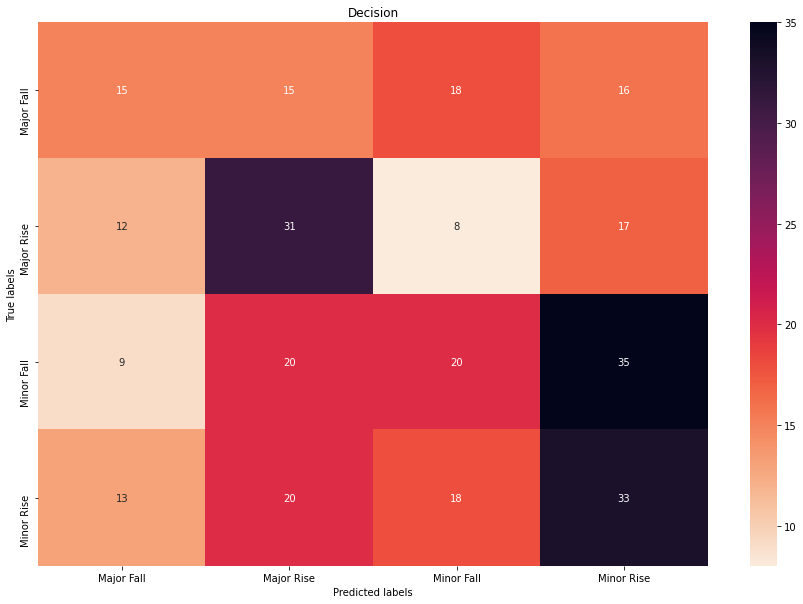

In [134]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_multilabel_classification
from sklearn.tree import DecisionTreeClassifier
import seaborn as sn

#disp = ConfusionMatrixDisplay(cf_matrix, display_labels=clf.classes_)

fig, ax= plt.subplots(figsize=(15,10))
sn.heatmap(cf_matrix,annot=True, ax = ax, cmap='rocket_r', fmt='g')
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Decision');
ax.xaxis.set_ticklabels(['Major Fall', 'Major Rise', 'Minor Fall', 'Minor Rise']);
ax.yaxis.set_ticklabels(['Major Fall', 'Major Rise', 'Minor Fall', 'Minor Rise']);

In [135]:
vect_new = TfidfVectorizer(min_df=5, ngram_range=(1,3), max_df=0.8).fit(X_train)
tfid_x_train = vect_new.transform(X_train)
tfid_x_test = vect_new.transform(X_test)

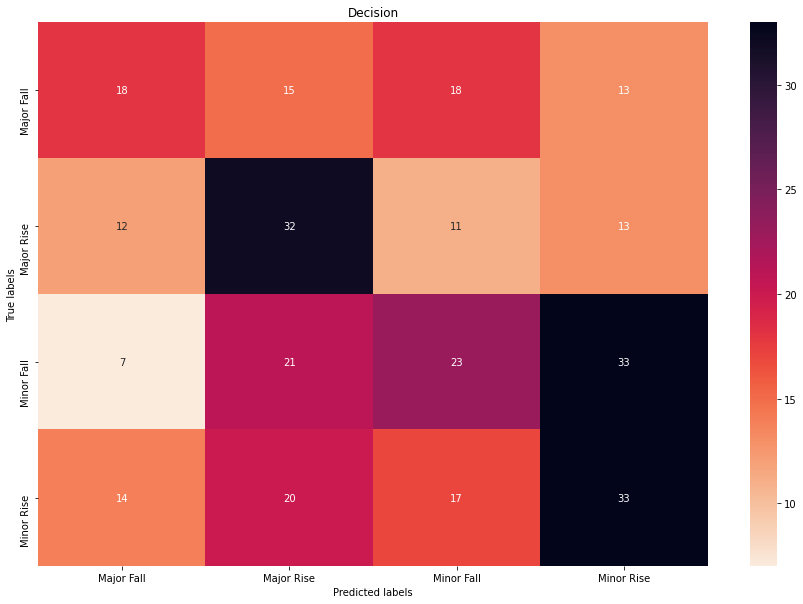

In [136]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(tfid_x_train, y_train)
y_pred = clf.predict(tfid_x_test)

cf_matrix = confusion_matrix(y_test, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sn.heatmap(cf_matrix,annot=True, ax = ax, cmap='rocket_r', fmt='g',)
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Decision');
ax.xaxis.set_ticklabels(['Major Fall', 'Major Rise', 'Minor Fall', 'Minor Rise']);
ax.yaxis.set_ticklabels(['Major Fall', 'Major Rise', 'Minor Fall', 'Minor Rise']);

In [137]:
clf.score(tfid_x_test, y_test)

0.35333333333333333

## Iteration 2


In [138]:
clf = MLPClassifier(activation='relu', alpha=0.0001, hidden_layer_sizes=(20,), learning_rate= 'adaptive', solver='adam').fit(tfid_x_train, y_train)

C:\Users\malth\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


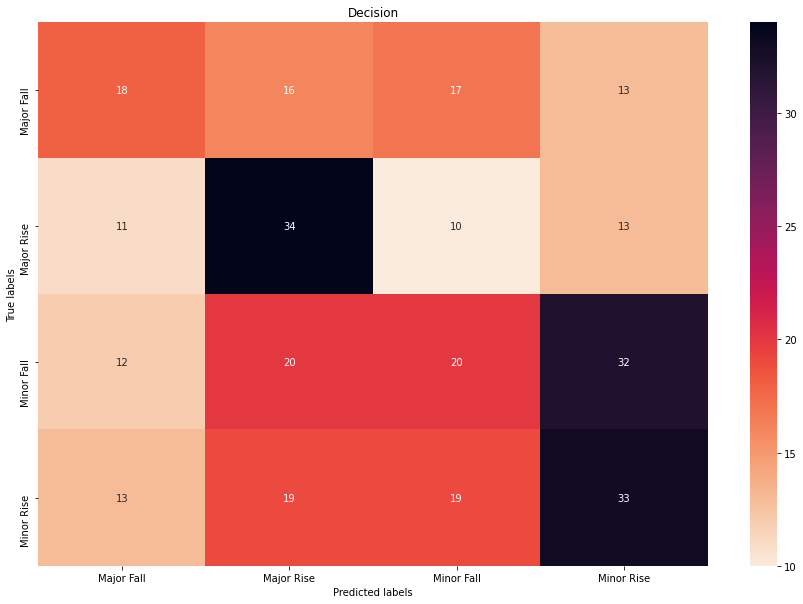

In [139]:
y_pred = clf.predict(tfid_x_test)

cf_matrix = confusion_matrix(y_test, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sn.heatmap(cf_matrix,annot=True, ax = ax, cmap='rocket_r', fmt='g',)
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Decision');
ax.xaxis.set_ticklabels(['Major Fall', 'Major Rise', 'Minor Fall', 'Minor Rise']);
ax.yaxis.set_ticklabels(['Major Fall', 'Major Rise', 'Minor Fall', 'Minor Rise']);

In [140]:
clf.score(tfid_x_test, y_test)

0.35

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Major Fall       0.33      0.22      0.26        64
  Major Rise       0.39      0.53      0.45        68
  Minor Fall       0.35      0.30      0.32        84
  Minor Rise       0.37      0.40      0.38        84

    accuracy                           0.36       300
   macro avg       0.36      0.36      0.35       300
weighted avg       0.36      0.36      0.36       300



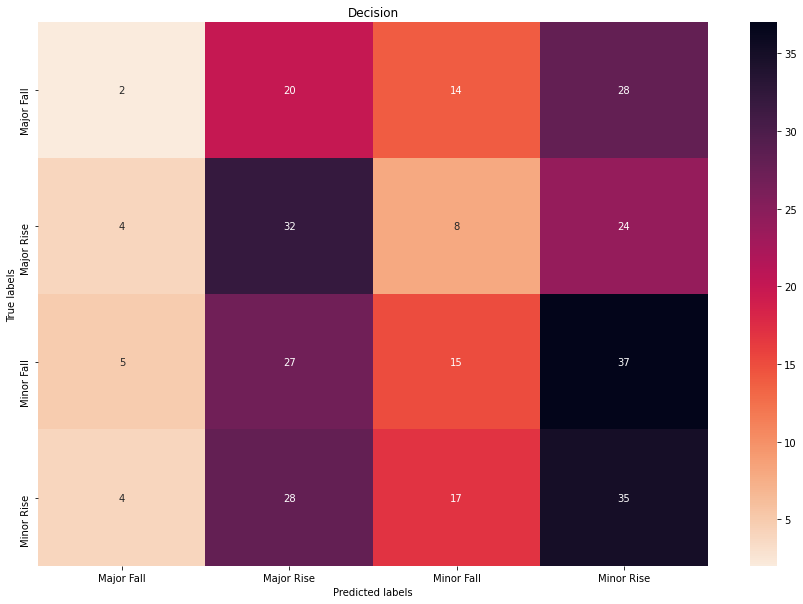

In [42]:
rfc = RandomForestClassifier().fit(tfid_x_train, y_train)

y_pred = rfc.predict(tfid_x_test)


cf_matrix = confusion_matrix(y_test, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sn.heatmap(cf_matrix,annot=True, ax = ax, cmap='rocket_r', fmt='g',)
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Decision');
ax.xaxis.set_ticklabels(['Major Fall', 'Major Rise', 'Minor Fall', 'Minor Rise']);
ax.yaxis.set_ticklabels(['Major Fall', 'Major Rise', 'Minor Fall', 'Minor Rise']);

In [43]:
rfc.score(tfid_x_test, y_test)

0.28

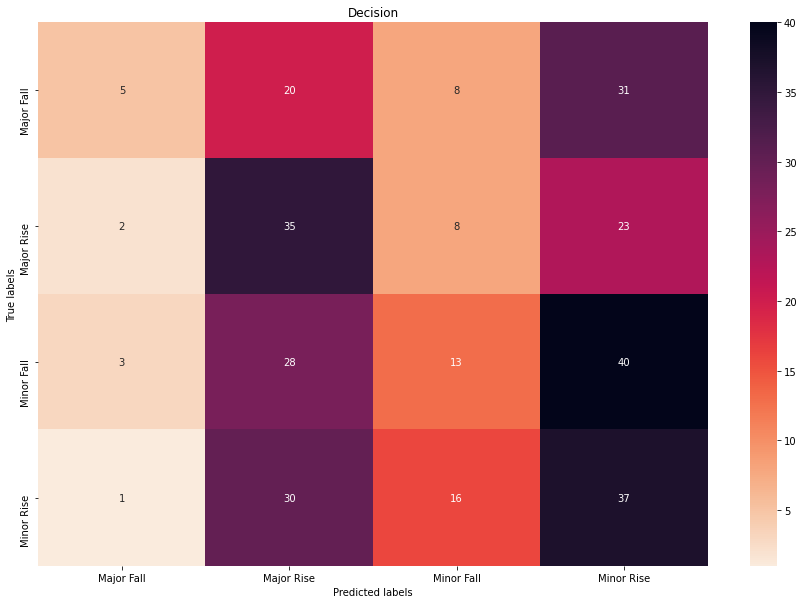

In [44]:
rfc = RandomForestClassifier(criterion='entropy', max_features='auto', n_estimators=500).fit(tfid_x_train, y_train)

y_pred = rfc.predict(tfid_x_test)


cf_matrix = confusion_matrix(y_test, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sn.heatmap(cf_matrix,annot=True, ax = ax, cmap='rocket_r', fmt='g',)
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Decision');
ax.xaxis.set_ticklabels(['Major Fall', 'Major Rise', 'Minor Fall', 'Minor Rise']);
ax.yaxis.set_ticklabels(['Major Fall', 'Major Rise', 'Minor Fall', 'Minor Rise']);

In [45]:
rfc.score(tfid_x_test, y_test)

0.3

# Iteration 3

In [95]:
# Split our training set into a 75% 25% train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(grp_sameday_df.Title, grp_sameday_df.Stock_Class, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((898,), (300,), (898,), (300,))

In [101]:
from sklearn.feature_extraction.text import CountVectorizer
vect_new = CountVectorizer(min_df=5, ngram_range=(1,3), max_df=0.8).fit(X_train)
cvect_x_train = vect_new.transform(X_train)
cvect_x_test = vect_new.transform(X_test)

In [102]:
clf = MLPClassifier(activation='relu', alpha=0.0001, hidden_layer_sizes=(20,), learning_rate= 'adaptive', solver='adam').fit(cvect_x_train, y_train)

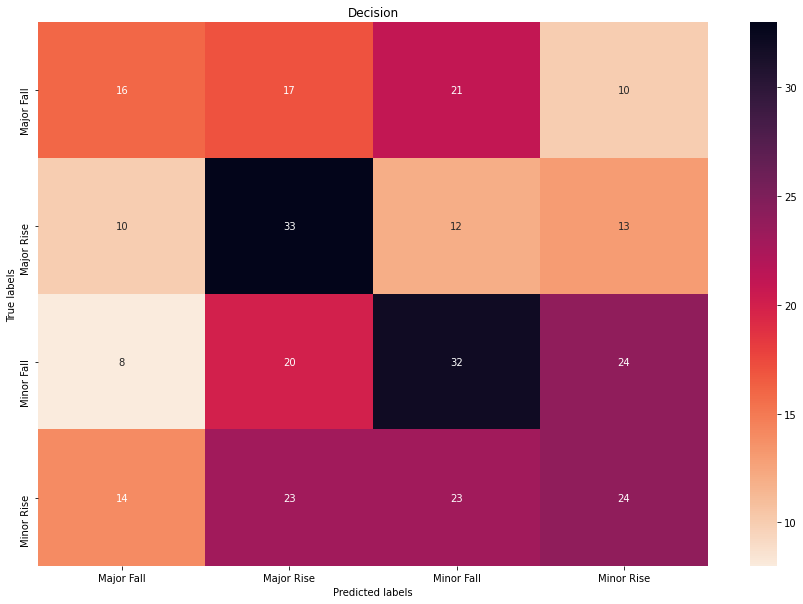

In [150]:
y_pred = clf.predict(cvect_x_test)

cf_matrix = confusion_matrix(y_test, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sn.heatmap(cf_matrix,annot=True, ax = ax, cmap='rocket_r', fmt='g',)
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Decision');
ax.xaxis.set_ticklabels(['Major Fall', 'Major Rise', 'Minor Fall', 'Minor Rise']);
ax.yaxis.set_ticklabels(['Major Fall', 'Major Rise', 'Minor Fall', 'Minor Rise']);

In [168]:
clf.score(cvect_x_test, y_test)

0.35